In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#import CSV
disaster_data = "Resources/All USA Disasters.csv"
average_temp_year = "Resources/average_temp_by_year.csv"
sea_level_rise = "Resources/sea_rise.csv"


In [9]:
#Read CSV
disaster_df = pd.read_csv(disaster_data)
average_temp_year = pd.read_csv(average_temp_year)
sea_level_rise_df = pd.read_csv(sea_level_rise)

In [50]:
#Convert to DataFrame

total_disaster_cost = disaster_df[["Year","Drought Cost","Flooding Cost","Freeze Cost","Severe Storm Cost","Tropical Cyclone Cost","Wildfire Cost","Winter Storm Cost","All Disasters Cost"]]

#DataFrame: Total Disaster Costs by Year
total_disaster_cost

avg_temp_by_year = average_temp_year[["Year", "Yearly Average"]]

avg_temp_by_year_cleaned = avg_temp_by_year.drop(avg_temp_by_year.index[0:100])
avg_temp_by_year_cleaned
average_temperature_by_year_df = avg_temp_by_year_cleaned.set_index('Year')

#Dataframe: Yearly Temp Changes through 2018 (Difference from Mean)
average_temperature_by_year_df

#Dataframe: Average Temp through 2013

average_temperature_index = average_temperature_by_year_df.reset_index()
average_temperature_index
average_temperature_by_2013 = average_temperature_index.drop(average_temperature_index.index[34:41])

average_temperature_by_2013

#DataFrame: Sea Level Rise (Inches)
sea_level_rise_cleaned1 = sea_level_rise_df.drop(avg_temp_by_year.index[0:100])
sea_level_rise_cleaned2 = sea_level_rise_cleaned1.drop(avg_temp_by_year.index[134:136])


sea_level_rise_cleaned2[["Year", "CSIRO - Adjusted sea level (inches)"]]
sea_level_rise_cleaned2['Year'] = sea_level_rise_cleaned2['Year'].map("{:.0f}".format)
sea_level_rise_cleaned2['CSIRO - Adjusted sea level (inches)'] = sea_level_rise_cleaned2['CSIRO - Adjusted sea level (inches)'].map("{:.2f}".format)
sea_level_rise_cleaned2[["Year", "CSIRO - Adjusted sea level (inches)"]]
sea_level_rise_cleaned3 = sea_level_rise_cleaned2[["Year", "CSIRO - Adjusted sea level (inches)"]]
sea_level_rise_final_df = sea_level_rise_cleaned3.set_index('Year')
sea_level_rise_final_df

slr_no_index = sea_level_rise_final_df.reset_index()

slr_alone = slr_no_index[["CSIRO - Adjusted sea level (inches)"]]
slr_alone




slr_temp_merged = pd.DataFrame({
                                "Year" : average_temperature_by_2013["Year"],
                                "Average Temp": average_temperature_by_2013["Yearly Average"],
                                "Sea Level Rise (Inches)": slr_alone["CSIRO - Adjusted sea level (inches)"]
                                })
slr_temp_merged

#DataFrame: Sea Level Rise with Temp Increases by Year

slr_merged_by_year = slr_temp_merged.set_index("Year")
slr_merged_by_year

slr_merged_by_year["Average Temp"] = pd.to_numeric(slr_merged_by_year["Average Temp"])
slr_merged_by_year["Sea Level Rise (Inches)"] = pd.to_numeric(slr_merged_by_year["Sea Level Rise (Inches)"])

The r-squared is: 0.7389310889962325


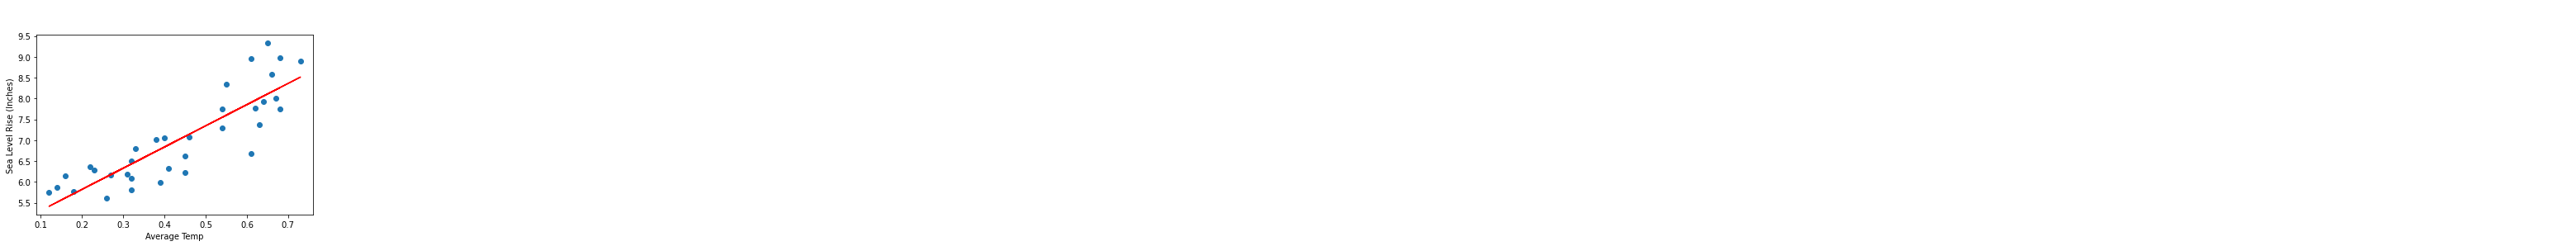

In [59]:
#Sea Level Rise Regression Analysis by Temperature
x_values = slr_merged_by_year['Average Temp']
y_values = slr_merged_by_year['Sea Level Rise (Inches)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Temp')
plt.ylabel('Sea Level Rise (Inches)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
